Case Studies

Project: 1

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)


Requirements:
 - numpy==1.24.2
 - matplotlib==3.7.1
 - seaborn==0.12.2
 - pandas==2.0.0
 - openpyxl==3.1.2

Installation Commands (One-time only)
 - pip install pandas==2.0.0
 - pip install numpy==1.24.2
 - pip install seaborn==0.12.2
 - pip install matplotlib==3.7.1
 - pip install openpyxl==3.1.2

Imports and Libraries

In [88]:
import pandas as pd
import numpy as np
import itertools
import pprint

# used for the graphs
import seaborn as sns
import os
sns.set(font_scale = 1.2)

# used for plotting
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib

# setting font to 'Times New Roman'
matplotlib.rcParams["font.family"] = "Times New Roman"
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline

Global Variables and Constants

Importing Data

In [2]:
file_path = "../styrian_health_data.xlsx"
sheet_name = "Sheet 1"
data_df = pd.read_excel(file_path, sheet_name=sheet_name)

/Users/farrukhahmed/opt/anaconda3/envs/case-study/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Reformating Columns to Correct Data Types, dropping nans and creating new variables

In [3]:
# fixing dtypes
data_df.postleitzahl = data_df.postleitzahl.astype('str')
data_df.geburtsjahr = data_df.geburtsjahr.astype('Int64')
# data_df.befinden = data_df.befinden.astype('Int64')
data_df.messwert_bp_sys = pd.to_numeric(data_df.messwert_bp_sys)
data_df.messwert_bp_dia = pd.to_numeric(data_df.messwert_bp_dia)
data_df.schaetzwert_bp_sys = pd.to_numeric(data_df.schaetzwert_bp_sys)
data_df.schaetzwert_by_dia = pd.to_numeric(data_df.schaetzwert_by_dia)

# adding variable for is_local
mask = data_df.gemeinde.isna() & data_df.bezirk.isna() & data_df.bundesland.isna()
data_df["is_local_resident"] = True
data_df.loc[mask, "is_local_resident"] = False

# adding variable for age
age =  data_df["zeit"].dt.year - pd.to_datetime(data_df['geburtsjahr'], format='%Y').dt.year
data_df["age"] = age.astype("Int64")

# adding variable for age group
data_df["age_group"] = pd.cut(data_df.age, bins=[0,12,19,65,130],labels=['children', 'teenager', 'adult','65 over'])
data_df["age_group"] = data_df.age_group.astype(str)

#replacing nans for variables

data_df.loc[data_df.geschlecht.isna() == True, 'raucher'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'blutzucker_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'cholesterin_bekannt'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'in_behandlung'] = "unknown"
data_df.loc[data_df.geschlecht.isna() == True, 'befinden'] = "unknown"
data_df.loc[data_df.age_group == "nan", 'age_group'] = "unknown"

data_df.loc[mask, 'gemeinde'] = "not applicable"
data_df.loc[mask, 'bezirk'] = "not applicable"
data_df.loc[mask, 'bundesland'] = "not applicable"
data_df.loc[mask, 'postleitzahl'] = "not applicable"
data_df.loc[data_df.postleitzahl == "nan", 'postleitzahl'] = "unknown"

# creating variables for missing values in bp

data_df["is_missing_schaetzwert_bp_sys"] = False
data_df.loc[data_df.schaetzwert_bp_sys.isna() == True, "is_missing_schaetzwert_bp_sys"] = True
data_df["is_missing_schaetzwert_by_dia"] = False
data_df.loc[data_df.schaetzwert_by_dia.isna() == True, "is_missing_schaetzwert_by_dia"] = True

# removing useless variables
data_df.drop(data_df[data_df.age > 100].index, inplace=True)
data_df.drop(data_df[data_df.age < 15].index, inplace=True)

data_df.loc[data_df.geschlecht.isna() == True, 'geschlecht'] = "unknown"

In [4]:
# Counts for missing values per column
data_df.isna().sum()

id                                0
zeit                              0
terminal                          0
postleitzahl                      0
gemeinde                          0
bezirk                            0
bundesland                        0
befinden                          0
geburtsjahr                      23
geschlecht                        0
raucher                           0
blutzucker_bekannt                0
cholesterin_bekannt               0
in_behandlung                     0
schaetzwert_bp_sys               27
schaetzwert_by_dia               35
messwert_bp_sys                   0
messwert_bp_dia                   0
is_local_resident                 0
age                              23
age_group                         0
is_missing_schaetzwert_bp_sys     0
is_missing_schaetzwert_by_dia     0
dtype: int64

In [5]:
len(data_df)

14887

In [32]:
data_df = data_df.dropna()
data_df.isna().sum()

id                               0
zeit                             0
terminal                         0
postleitzahl                     0
gemeinde                         0
bezirk                           0
bundesland                       0
befinden                         0
geburtsjahr                      0
geschlecht                       0
raucher                          0
blutzucker_bekannt               0
cholesterin_bekannt              0
in_behandlung                    0
schaetzwert_bp_sys               0
schaetzwert_by_dia               0
messwert_bp_sys                  0
messwert_bp_dia                  0
is_local_resident                0
age                              0
age_group                        0
is_missing_schaetzwert_bp_sys    0
is_missing_schaetzwert_by_dia    0
bp_category                      0
dtype: int64

In [33]:
len(data_df)

14831

In [52]:
data_df['is_smoker'] = data_df['raucher'].astype(int)
data_df['have_diabetes'] = data_df['blutzucker_bekannt'].astype(int)
data_df['have_cholesterole'] = data_df['cholesterin_bekannt'].astype(int)
data_df['hypertension_treatment'] = data_df['in_behandlung'].astype(int)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14831 entries, 0 to 16384
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             14831 non-null  int64         
 1   zeit                           14831 non-null  datetime64[ns]
 2   terminal                       14831 non-null  int64         
 3   postleitzahl                   14831 non-null  object        
 4   gemeinde                       14831 non-null  object        
 5   bezirk                         14831 non-null  object        
 6   bundesland                     14831 non-null  object        
 7   befinden                       14831 non-null  object        
 8   geburtsjahr                    14831 non-null  Int64         
 9   geschlecht                     14831 non-null  object        
 10  raucher                        14831 non-null  object        
 11  blutzucker_beka

In [55]:
data_df['bp_category'] = np.select([
    np.logical_and(data_df['messwert_bp_sys'] < 120,data_df['messwert_bp_dia'] < 80 ),
    np.logical_and(np.logical_and(data_df['messwert_bp_sys'] >= 120,data_df['messwert_bp_sys'] <= 129),data_df['messwert_bp_dia'] < 80),
    np.logical_or(np.logical_and(data_df['messwert_bp_sys'] >= 130 , data_df['messwert_bp_sys'] <= 139),np.logical_and(data_df['messwert_bp_dia'] >= 80,data_df['messwert_bp_dia'] <= 89)),
    np.logical_or(data_df['messwert_bp_sys'] >= 140,data_df['messwert_bp_dia'] >= 90),
    np.logical_or(data_df['messwert_bp_sys'] >= 180,data_df['messwert_bp_dia'] >= 120),

    ], ['Normal', 'Elevated', 'HyperTension Stage 1', 'HyperTension Stage 2','HyperTensive Crisis'])

In [56]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14831 entries, 0 to 16384
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             14831 non-null  int64         
 1   zeit                           14831 non-null  datetime64[ns]
 2   terminal                       14831 non-null  int64         
 3   postleitzahl                   14831 non-null  object        
 4   gemeinde                       14831 non-null  object        
 5   bezirk                         14831 non-null  object        
 6   bundesland                     14831 non-null  object        
 7   befinden                       14831 non-null  object        
 8   geburtsjahr                    14831 non-null  Int64         
 9   geschlecht                     14831 non-null  object        
 10  raucher                        14831 non-null  object        
 11  blutzucker_beka

In [57]:
rslt_df = data_df[data_df['bp_category'] == 'Elevated'] 
rslt_df


,id,zeit,terminal,postleitzahl,gemeinde,bezirk,bundesland,befinden,geburtsjahr,geschlecht,...,is_local_resident,age,age_group,is_missing_schaetzwert_bp_sys,is_missing_schaetzwert_by_dia,bp_category,is_smoker,have_diabetes,have_cholesterole,hypertension_treatment
37,11589,2006-04-28 11:18:57,1,8605.0,Kapfenberg,Bruck an der Mur,Steiermark,2.0,1984,f,...,True,22,adult,False,False,Elevated,0,0,0,0
52,11612,2006-04-28 14:17:57,1,not applicable,not applicable,not applicable,not applicable,1.0,1979,m,...,False,27,adult,False,False,Elevated,0,0,0,1
57,11619,2006-04-28 14:47:25,3,8990.0,Bad Aussee,Liezen,Steiermark,1.0,1979,m,...,True,27,adult,False,False,Elevated,0,0,0,0
60,11623,2006-04-28 15:15:57,2,8010.0,Graz - Sankt Leonhard,Graz(Stadt),Steiermark,1.0,1979,m,...,True,27,adult,False,False,Elevated,0,0,0,0
222,11807,2006-04-30 12:14:12,3,8600.0,Bruck an der Mur,Bruck an der Mur,Steiermark,1.0,1959,m,...,True,47,adult,False,False,Elevated,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16254,34216,2006-10-28 14:25:39,3,8020.0,Graz - Lend,Graz(Stadt),Steiermark,2.0,1941,f,...,True,65,adult,False,False,Elevated,0,0,0,0
16290,34351,2006-10-28 17:03:16,2,8665.0,Langenwang,Mürzzuschlag,Steiermark,2.0,1981,m,...,True,25,adult,False,False,Elevated,0,1,1,0
16326,34475,2006-10-29 12:05:38,3,8020.0,Graz - Eggenberg,Graz(Stadt),Steiermark,1.0,1964,f,...,True,42,adult,False,False,Elevated,0,1,1,0
16357,34607,2006-10-29 15:13:42,1,8234.0,Rohrbach an der Lafnitz,Hartberg,Steiermark,1.0,1963,m,...,True,43,adult,False,False,Elevated,0,0,1,0


In [9]:
##Decision Trees

In [58]:
ohe = OneHotEncoder()
ohe.fit_transform(data_df[['geschlecht','bundesland','age_group']]).toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [59]:
ohe.categories_

[array(['f', 'm'], dtype=object),
 array(['Burgenland', 'Kärnten', 'Niederösterreich', 'Oberösterreich',
        'Salzburg', 'Steiermark', 'Tirol', 'Vorarlberg', 'Wien',
        'not applicable'], dtype=object),
 array(['65 over', 'adult', 'teenager'], dtype=object)]

In [60]:
new_feature = ohe.fit_transform(data_df[['geschlecht','bundesland','age_group']]).toarray()
new_feature_labels = ohe.categories_
new_feature_labels = np.concatenate( new_feature_labels, axis=0 )
print(new_feature_labels)

['f' 'm' 'Burgenland' 'Kärnten' 'Niederösterreich' 'Oberösterreich'
 'Salzburg' 'Steiermark' 'Tirol' 'Vorarlberg' 'Wien' 'not applicable'
 '65 over' 'adult' 'teenager']


In [61]:
new_features_df = pd.DataFrame(new_feature,columns=new_feature_labels)
#len(new_features_df)
new_features_df.head()

,f,m,Burgenland,Kärnten,Niederösterreich,Oberösterreich,Salzburg,Steiermark,Tirol,Vorarlberg,Wien,not applicable,65 over,adult,teenager
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
new_df = pd.concat([data_df.reset_index(drop=True),new_features_df.reset_index(drop=True)], axis=1)
len(new_df)

14831

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             14831 non-null  int64         
 1   zeit                           14831 non-null  datetime64[ns]
 2   terminal                       14831 non-null  int64         
 3   postleitzahl                   14831 non-null  object        
 4   gemeinde                       14831 non-null  object        
 5   bezirk                         14831 non-null  object        
 6   bundesland                     14831 non-null  object        
 7   befinden                       14831 non-null  object        
 8   geburtsjahr                    14831 non-null  Int64         
 9   geschlecht                     14831 non-null  object        
 10  raucher                        14831 non-null  object        
 11  blutzucker_beka

In [125]:
features = ['f','m','Burgenland','Kärnten','Niederösterreich','Oberösterreich','Salzburg','Steiermark','Tirol','Vorarlberg','Wien','is_smoker','have_diabetes','have_cholesterole','hypertension_treatment','schaetzwert_bp_sys','schaetzwert_by_dia','messwert_bp_dia','is_local_resident','65 over','adult','teenager']
X = new_df[features]
y = new_df['messwert_bp_sys']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



In [131]:
regression_model = DecisionTreeRegressor(criterion="squared_error",max_depth=4)   
regression_model.fit(X_train,y_train)
regression_model.score(X_test,y_test)

0.470895941484346

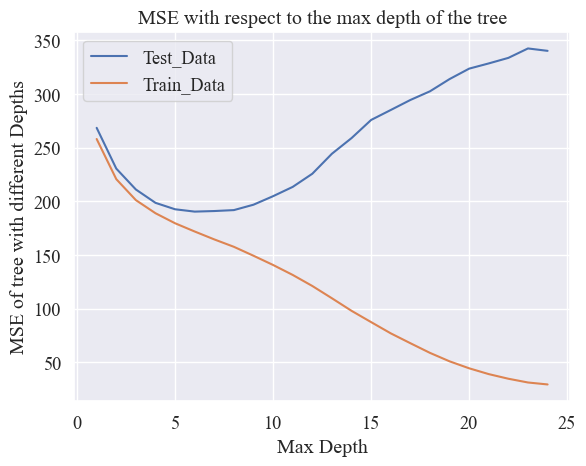

In [132]:
#y_pred_sys_1 = dtree_sys_1.predict(X_test)

fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

mse_rows = []

for i in range(1,25):
    regression_model = DecisionTreeRegressor(criterion="squared_error",max_depth=i)   
    regression_model.fit(X_train,y_train)
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    mse_train = mean_squared_error(y_train,predicted_train)
    RMSE_train.append(mse_train)
    mse_test = mean_squared_error(y_test,predicted_test)
    RMSE_test.append(mse_test)
    rsquared_test = regression_model.score(X_test,y_test)
    rsquared_train = regression_model.score(X_train, y_train)

    mse_rows.append([i,mse_train,mse_test,rsquared_train,rsquared_test])



df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    
ax0.plot(range(1,25),RMSE_test,label='Test_Data')
ax0.plot(range(1,25),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('MSE with respect to the max depth of the tree')
ax0.set_xlabel('Max Depth')
ax0.set_ylabel('MSE of tree with different Depths')
plt.show()

In [139]:
df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    

df_mse

,Depth,MSE Training Data,MSE Testing Data,R-squared Train,R-squared Test
0,1,257.994919,268.389491,0.298077,0.284708
1,2,220.610062,230.420328,0.399790,0.385901
2,3,201.050084,210.952281,0.453006,0.437786
3,4,188.852451,198.528782,0.486192,0.470896
4,5,179.496760,192.529905,0.511646,0.486884
5,6,171.823811,190.356579,0.532522,0.492676
6,7,164.453452,190.893160,0.552574,0.491246
7,8,157.559708,191.768624,0.571330,0.488913
8,9,149.244206,196.799356,0.593954,0.475505
9,10,140.636507,204.738549,0.617372,0.454346


In [134]:
features = ['f','m','Burgenland','Kärnten','Niederösterreich','Oberösterreich','Salzburg','Steiermark','Tirol','Vorarlberg','Wien','is_smoker','have_diabetes','have_cholesterole','hypertension_treatment','schaetzwert_bp_sys','schaetzwert_by_dia','messwert_bp_sys','is_local_resident','65 over','adult','teenager']
X = new_df[features]
y = new_df['messwert_bp_dia'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

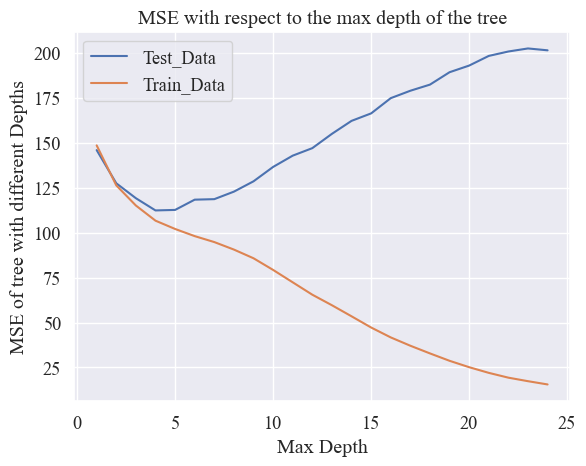

In [141]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

mse_rows = []

for i in range(1,25):
    regression_model = DecisionTreeRegressor(criterion="squared_error",max_depth=i)   
    regression_model.fit(X_train,y_train)
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    mse_train = mean_squared_error(y_train,predicted_train)
    RMSE_train.append(mse_train)
    mse_test = mean_squared_error(y_test,predicted_test)
    RMSE_test.append(mse_test)
    rsquared_test = regression_model.score(X_test,y_test)
    rsquared_train = regression_model.score(X_train, y_train)

    mse_rows.append([i,mse_train,mse_test,rsquared_train,rsquared_test])



df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    
ax0.plot(range(1,25),RMSE_test,label='Test_Data')
ax0.plot(range(1,25),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('MSE with respect to the max depth of the tree')
ax0.set_xlabel('Max Depth')
ax0.set_ylabel('MSE of tree with different Depths')
plt.show()

In [142]:
df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    
df_mse


,Depth,MSE Training Data,MSE Testing Data,R-squared Train,R-squared Test
0,1,148.475281,145.859811,0.263191,0.270774
1,2,126.255088,127.407092,0.373459,0.363028
2,3,115.047308,119.109825,0.429078,0.404510
3,4,106.620125,112.315565,0.470898,0.438478
4,5,102.018031,112.597745,0.493735,0.437067
5,6,98.034098,118.302680,0.513506,0.408546
6,7,94.725414,118.585327,0.529925,0.407132
7,8,90.554105,122.762256,0.550625,0.386250
8,9,85.725613,128.500536,0.574587,0.357561
9,10,79.239062,136.498798,0.606776,0.317574


In [143]:
features = ['f','m','Burgenland','Kärnten','Niederösterreich','Oberösterreich','Salzburg','Steiermark','Tirol','Vorarlberg','Wien','is_smoker','have_diabetes','have_cholesterole','hypertension_treatment','messwert_bp_dia','schaetzwert_by_dia','messwert_bp_sys','is_local_resident','65 over','adult','teenager']
X = new_df[features]
y = new_df['schaetzwert_bp_sys'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

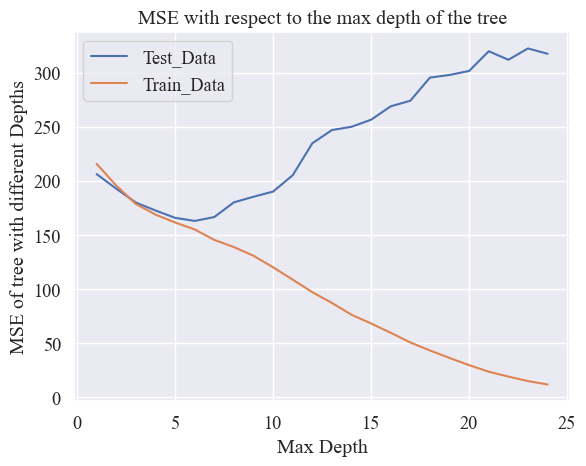

In [144]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

mse_rows = []

for i in range(1,25):
    regression_model = DecisionTreeRegressor(criterion="squared_error",max_depth=i)   
    regression_model.fit(X_train,y_train)
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    mse_train = mean_squared_error(y_train,predicted_train)
    RMSE_train.append(mse_train)
    mse_test = mean_squared_error(y_test,predicted_test)
    RMSE_test.append(mse_test)
    rsquared_test = regression_model.score(X_test,y_test)
    rsquared_train = regression_model.score(X_train, y_train)

    mse_rows.append([i,mse_train,mse_test,rsquared_train,rsquared_test])



df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    
ax0.plot(range(1,25),RMSE_test,label='Test_Data')
ax0.plot(range(1,25),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('MSE with respect to the max depth of the tree')
ax0.set_xlabel('Max Depth')
ax0.set_ylabel('MSE of tree with different Depths')
plt.show()

In [145]:
df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    
df_mse

,Depth,MSE Training Data,MSE Testing Data,R-squared Train,R-squared Test
0,1,215.628282,206.168897,0.152795,0.165961
1,2,195.557778,192.703981,0.231652,0.220432
2,3,178.575196,179.882825,0.298377,0.272299
3,4,168.783285,172.594177,0.336849,0.301784
4,5,161.458964,165.785058,0.365627,0.329330
5,6,155.082833,162.930495,0.390679,0.340878
6,7,145.356584,166.508538,0.428893,0.326403
7,8,138.782585,180.103252,0.454722,0.271407
8,9,130.723347,185.267917,0.486387,0.250514
9,10,120.099272,190.049210,0.528129,0.231172


In [146]:
features = ['f','m','Burgenland','Kärnten','Niederösterreich','Oberösterreich','Salzburg','Steiermark','Tirol','Vorarlberg','Wien','is_smoker','have_diabetes','have_cholesterole','hypertension_treatment','messwert_bp_dia','schaetzwert_bp_sys','messwert_bp_sys','is_local_resident','65 over','adult','teenager']
X = new_df[features]
y = new_df['schaetzwert_by_dia'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

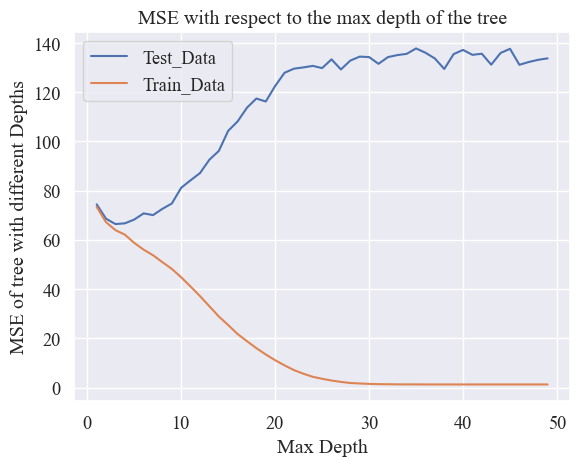

In [122]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

mse_rows = []

for i in range(1,50):
    regression_model = DecisionTreeRegressor(criterion="squared_error",max_depth=i)   
    regression_model.fit(X_train,y_train)
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    mse_train = mean_squared_error(y_train,predicted_train)
    RMSE_train.append(mse_train)
    mse_test = mean_squared_error(y_test,predicted_test)
    RMSE_test.append(mse_test)
    
    
df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data","R-squared Train","R-squared Test"])    
ax0.plot(range(1,50),RMSE_test,label='Test_Data')
ax0.plot(range(1,50),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('MSE with respect to the max depth of the tree')
ax0.set_xlabel('Max Depth')
ax0.set_ylabel('MSE of tree with different Depths')
plt.show()

In [123]:
df_mse = pd.DataFrame(mse_rows, columns=["Depth", "MSE Training Data","MSE Testing Data"])    
df_mse

,Depth,MSE Training Data,MSE Testing Data
0,1,73.388147,74.408421
1,2,67.146106,68.558418
2,3,63.931122,66.395028
3,4,62.091211,66.688905
4,5,58.750521,68.233847
5,6,56.003001,70.737064
6,7,53.725896,70.039990
7,8,50.920088,72.588513
8,9,48.187438,74.744428
9,10,44.767853,81.140834


[Text(0.5028237487672583, 0.9545454545454546, 'x[17] <= 84.5\nsquared_error = 375.942\nsamples = 9936\nvalue = 125.952'),
 Text(0.23855861686390534, 0.8636363636363636, 'x[17] <= 70.5\nsquared_error = 247.453\nsamples = 5855\nvalue = 117.115'),
 Text(0.11532297830374753, 0.7727272727272727, 'x[19] <= 0.5\nsquared_error = 231.159\nsamples = 1636\nvalue = 108.007'),
 Text(0.05667529585798817, 0.6818181818181818, 'x[17] <= 63.5\nsquared_error = 180.469\nsamples = 1410\nvalue = 105.989'),
 Text(0.017443293885601577, 0.5909090909090909, 'x[17] <= 43.5\nsquared_error = 196.893\nsamples = 459\nvalue = 100.752'),
 Text(0.004930966469428008, 0.5, 'x[17] <= 35.5\nsquared_error = 419.905\nsamples = 13\nvalue = 75.308'),
 Text(0.0019723865877712033, 0.4090909090909091, 'x[18] <= 0.5\nsquared_error = 104.0\nsamples = 3\nvalue = 57.0'),
 Text(0.0009861932938856016, 0.3181818181818182, 'squared_error = 0.0\nsamples = 1\nvalue = 43.0'),
 Text(0.0029585798816568047, 0.3181818181818182, 'x[16] <= 75.0\n

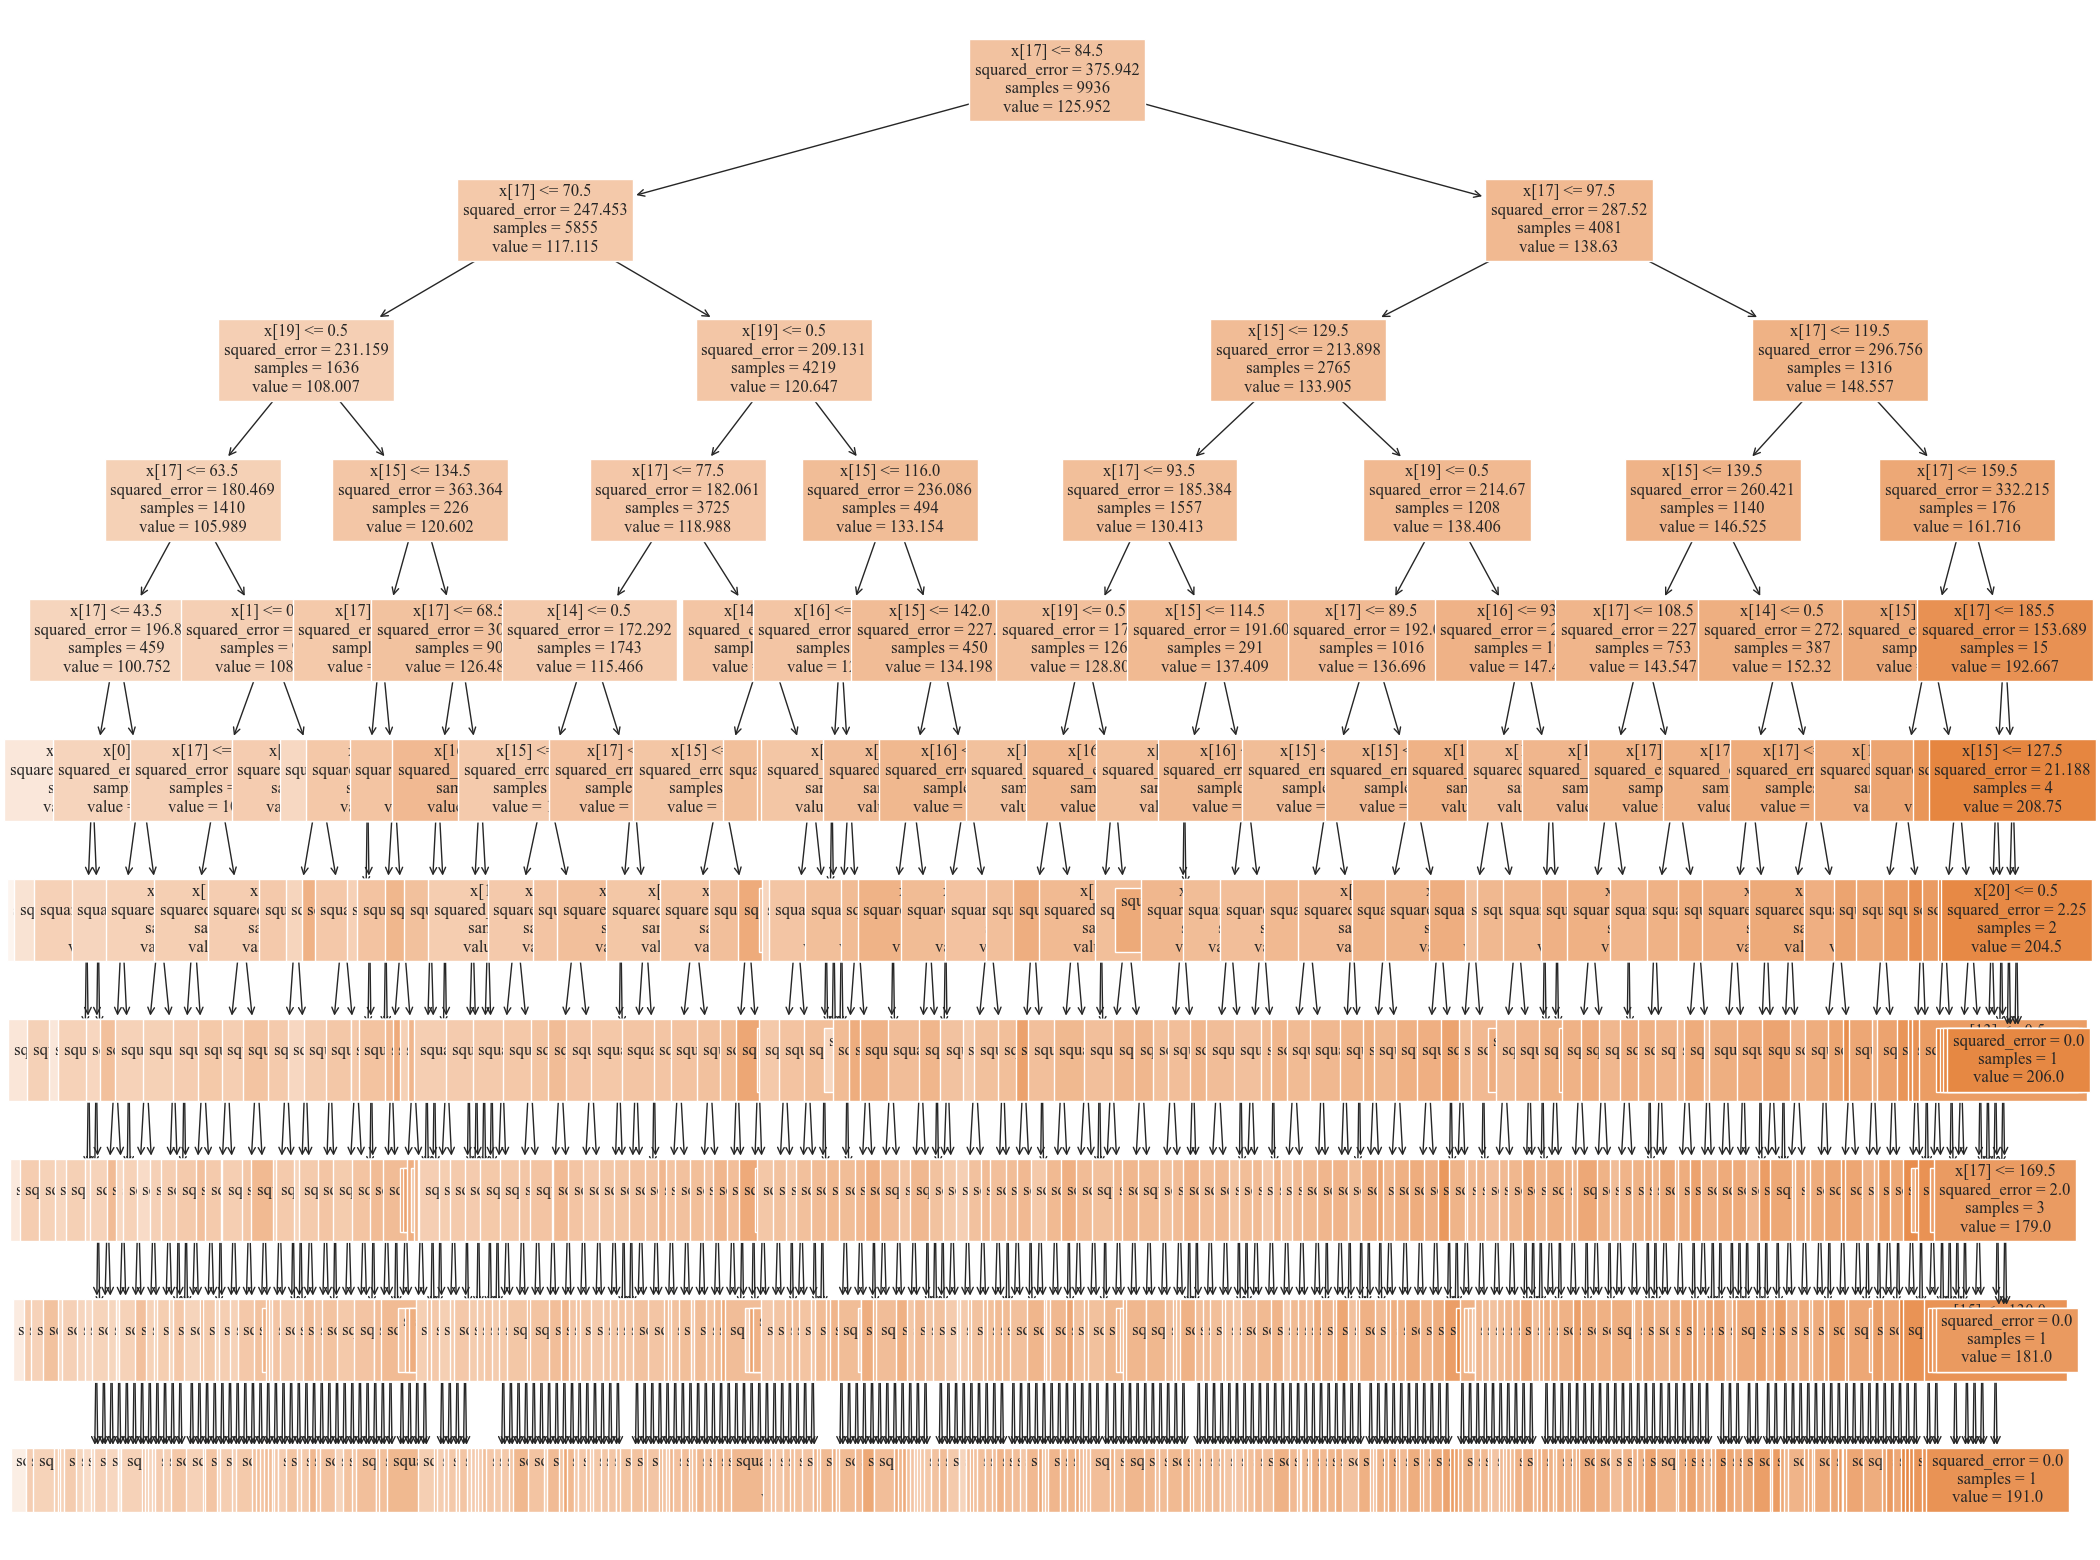

In [93]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtree_sys_2, fontsize=12, filled=True)

In [82]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [83]:
predictions = dtree.predict(X_test)
predictions

array([139.18681319, 102.34666667, 108.17885375, ..., 108.17885375,
       126.67068273, 108.17885375])

In [84]:
dtree.score(X_test, y_test)

0.47206930433150374

In [85]:
mean_squared_error(y_test,predictions)

189.15093341589238

In [86]:
np.sqrt(mean_squared_error(y_test,predictions))

13.75321538462524

In [ ]:
mean_squared_error(y_training,predictions)